In [ ]:
import random
random.choice('ACGT')

'A'

In [ ]:
seq = ''
 
for _ in range(10):
    seq += random.choice("ACGT")
print(seq)    

CACTACGAAT


In [ ]:
seq = ''

for i in range(10):
    seq += random.choice('ACGT')
print(seq)    
    

TAGTCATGAT


In [ ]:
seq = ''.join ([random.choice('ACGT') for i in range(10)])
print(seq)

AAAAATGCAC


In [ ]:
# Find the longest common prefix between 2 strings#
##################################################

def longestCommonPrefix(s1,s2):
    i = 0
    while i < len(s1) and i < len(s2) and s1[i] == s2[i]:
        i += 1
    return s1[:i]    
    
longestCommonPrefix('ACCATGT', 'ACCAGAC')    
    
     

'ACCA'

In [ ]:
# Determine if two strings match exactly#
#########################################

def match(s1,s2):
    if not len(s1) == len(s2):
        return False
    for i in range(len(s1)):
        if not s1[i] == s2[i]:
            return False
    return True    
        
print(match('ATGCT','ATGCT'))   
print(match('ATGCTAT', 'ATGCT'))
print(match('ATCGT', 'ATCGA'))
    
        

True
False
False


In [ ]:
# Check if strings are identical 
'ATCGT'=='ATCGA'

False

In [ ]:
'ATCGTA'== 'ATCGA'

False

In [ ]:
'ATGCT'=='ATGCT'

True

In [ ]:
# Dictionary for reverse Complement of DNA string

complement = {'A':'T','T':'A','C':'G','G':'C'}

complement['A']


'T'

In [ ]:
#Function to get reverse complement of DNA string#
##################################################

def reverseComplement(s):
    complement = {'A':'T','T':'A','C':'G','G':'C'}
    rev = ''
    for base in s:
        rev = complement[base] + rev
    return rev    

reverseComplement("ATGC")
        

'GCAT'

In [ ]:
#Read Genome from FASTA file#
#############################

def readGenome(filename):
    """ This function reads a FASTA file"""
    genome = '' # initialize genome to empty string
    with open(filename,'r') as f:               # Open file as f
        for line in f:                          # Loop therough and read each line of file f
            if not line[0] == '>':              # If line does not start with ">"
                genome += line.rstrip()         # Add line to the string genome, rstrip removes trailing whitespace from ends of string        
        
    return genome                               # After reading and adding all lines return the string genome

genome = readGenome("lambda_virus.fa")
genome[:100]

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC'

In [ ]:
# Check length of genome
len(genome)

48502

In [ ]:
# Count frequency of each base using dictionary

counts = {'A':0, 'T':0, 'C':0, 'G':0}


for base in genome:               #read each base from the string genome
    counts[base] += 1             # Add 1 to the value for the base in counts 
print(counts)
        

{'A': 12334, 'T': 11986, 'C': 11362, 'G': 12820}


In [ ]:
# Sum of all the bases
sum(counts.values())      # This should be equal to len(genome)

48502

In [ ]:
# Using module collections method Counter to count frequency of bases
import collections
collections.Counter(genome)


Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

In [ ]:
# Converting Base qualities values Q to character and  character to value Q#
############################################################################

#Take Q round to integer, covert integer to character

def QtoPhred33(Q):
    """Turn Q into Phred+33 ASCII encoded quality"""
    return chr(Q + 33) # converts character to integer

def phred33toQ(qual):
    """Turn Phred+33 ASCII-encoded quality into Q"""
    return ord(qual)-33 # converts integer to character


In [ ]:
#Function to parse a FASTQ file

In [ ]:
#First read from FASTQ file SRR835775_1.first1000.fastq
@SRR835775.1 1/1
TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC
+
???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################

In [ ]:
# Read FASTQ function#
######################

def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq('SRR835775_1.first1000.fastq')

In [ ]:
print(seqs[:5])

print(quals[:5])

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA', 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC']
['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==

In [ ]:
#Convert phred33 scores to Q quality value#
###########################################

def phred33toQ(qual):
    return ord(qual) - 33 # Change ASCII character to a number and subtract 33

In [ ]:
# Convert the "#" symbol to a quality score
phred33toQ('#') # its value is 2 so very low confidence, mostly at ends of reads

2

In [ ]:
phred33toQ('J') # That is less than 1 in 10000 that the base was called wrong

41

In [ ]:
#Function to create histogram of the quality of reads

def createHist(qualities):
    hist = [0] * 50                   #list initialized with 0's
    for qual in qualities:            # for each string of quality values in our list qualities
        for phred in qual:            # for each quality score in the string
            q = phred33toQ(phred)     #Get the number associated with quality score using function
            hist[q] += 1              # at pos/index q in hist increase the value by 1
                                      # So everytime we see a value of q qw increment the value at that pos by 1 
    return hist

h = createHist(quals)   # Returns the frequencies as a list of values 
                        #Lowest value can be 2 therefore we have values only starting at index 2
print(h)


[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
#Example for the above
his = [0] * 50
print(his)
type(his)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


list

In [ ]:
qa = 2 # at position 2
his[qa] += 1  #increment value by 1
print(his)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
his[qa] += 1
print(his)

[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
qa = 10
his[qa] += 1

In [ ]:
print(his)

[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


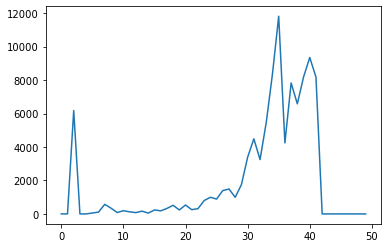

In [ ]:
# Plot the histogram
%matplotlib inline

import matplotlib.pyplot as plt
plt.plot(range(len(h)), h)
plt.show()

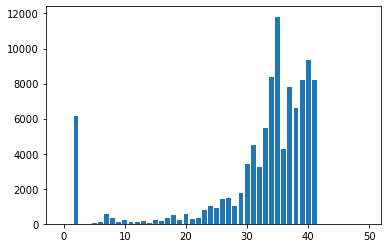

In [ ]:
# Plot the histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()

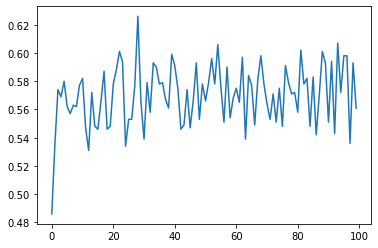

In [ ]:
#Analyzing GC in the reads by position

def findGCbyPos(reads):
    gc = [0] * 100      # Create a list of 0's to hold gc count
    total = [0] * 100   # List of zeros for total no of bases at each position
    
    for read in reads: # loop through each read
        for i in range(len(read)): # Loop through each base
            if read[i] == 'G' or read[i] == 'C':   # check if read is a G or C
                gc[i] += 1  # increment value at index i by 1 if base is G or C
                gc
            total[i] += 1   # for all bases (ATGC) increment at i by 1
            
    for i in range(len(gc)): #Loop through all bases in gc
        if total[i] > 0:     # Do it only if total at that index is gretaer than 0 to avoid division by  zero error  
            gc[i] = gc[i] / float(total[i])   # Divide the value of gc at each position by total, float to make sure we don't truncate integer
            # OR gc[i] /= float(total[i])
    return gc

gc = findGCbyPos(seqs)

#Plot gc using matplot lib

plt.plot(range(len(gc)), gc) # X val- length of gc or indices, Y val - gc content at those indices
plt.show()


In [ ]:
# We see above that there is some random fluctuation due to noise and that average GC content is higher than 
# 0.50 and that is correct as the human genome has GC content slightly higher than 50%

In [ ]:
# Determine distribution of bases in the reads

import collections
count = collections.Counter() # Varaible
for seq in seqs: #Loop through each sequence in seqs
    count.update(seq) # Pass in string to counter which is th seq of bases   
print(count)    

Counter({'G': 28742, 'C': 28272, 'T': 21836, 'A': 21132, 'N': 18})


In [ ]:
# Basic read alignment

t = "There would have been a time for such a word"
t.find('word')

40

In [ ]:
len(t)

44

In [ ]:
s = 'happy birthday'
len(s)

14

In [ ]:
x = 'day'
len(x)

3

In [ ]:
#Read Genome from FASTA file

def readGenome(filename):
    """ This function reads a FASTA file"""
    genome = '' # initialize genome to empty string
    with open(filename,'r') as f:               # Open file as f
        for line in f:                          # Loop therough and read each line of file f
            if not line[0] == '>':              # If line does not start with ">"
                genome += line.rstrip()         # Add line to the string genome, rstrip removes trailing whitespace from ends of string        
        
    return genome                               # After reading and adding all lines return the string genome



In [ ]:
genome = readGenome("phix.fa")
genome[:100]

'GAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCGGATATTTCTGATGAGTCGAAAAATTATCTTGATAAAGCAGGAATTACTACTGCTTGTTTA'

In [ ]:
# Naive Exact Match Function

def naive(pattern, text):
    occurrences = []    
    
    for i in range(len(text)-len(pattern)+1):#Loop through all positions where patter could start 
        match = True
        for j in range(len(pattern)):           
            if text[i+j] != pattern[j]: # Compare character at index i+j in text with character at index j in pattern
                match = False           # If they dont match
                break                   # Break from the inner loop    
                
        if match:    # If match is still True after comparison it means that characters match at the index we are comparing                           
            occurrences.append(i)  #Add the indedx to list of occurences
    return occurrences
    

In [ ]:
t = 'AGCTTAGATAGC'
p ='AG'


In [ ]:
naive(p,t)

[0, 5, 9]

In [ ]:
# Check
t[0:2]
t[5:7]
t[7:9]


'AG'

In [ ]:
# Function to generate random artificial reads from the genome

import random
def generateReads(genome, numReads, readLen):
    ''' Generate reads from random positions in the given genome'''
    reads = []
    for i in range(numReads):
        start = random.randint(0, len(genome)-readLen) - 1
        read = genome[start:start+readLen]
        reads.append(read)
    return reads    

In [ ]:
reads = generateReads(genome, 100, 100 )

In [ ]:
reads[0:10]

['TCCGTCTTTCTCCATTGCGTCGTGGCCTTGCTATTGACTCTACTGTAGACATTTTTACTTTTTATGTCCCTCATCGTCACGTTTATGGTGAACAGTGGAT',
 'ACCCTGTTTTGTATGGCAACTTGCCGCCGCGTGAAATTTCTATGAAGGATGTTTTCCGTTCTGGTGATTCGTCTAAGAAGTTTAAGATTGCTGAGGGTCA',
 'TGGGTCTGCAAGCTGCTTATGCTAATTTGCATACTGACCAAGAACGTGATTACTTCATGCAGCGTTACCATGATGTTATTTCTTCATTTGGAGGTAAAAC',
 'AGATATTGAAGCAGAACGCAAAAAGAGAGATGAGATTGAGGCTGGGAAAAGTTACTGTAGCCGACGTTTTGGCGGCGCAACCTGTGACGACAAATCTGCT',
 'TTAACCGAAGATGATTTCGATTTTCTGACGAGTAACAAAGTTTGGATTGCTACTGACCGCTCTCGTGCTCGTCGCTGCGTTGAGGCTTGCGTTTATGGTA',
 'CGCGCAGGAAACACTGACGTTCTTACTGACGCAGAAGAAAACGTGCGTCAAAAATTACGTGCGGAAGGAGTGATGTAATGTCTAAAGGTAAAAAACGTTC',
 'GATTGCTGGAGGCCTCCACTATGAAATCGCGTAGAGGCTTTGCTATTCAGCGTTTGATGAATGCAATGCGACAGGCTCATGCTGATGGTTGGTTTATCGT',
 'AGAAGACGGTTACGCAGTTTTGCCGCAAGCTGGCTGCTGAACGCCCTCTTAAGGATATTCGCGATGAGTATAATTACCCCAAAAAGAAAGGTATTAAGGA',
 'ATCCCTAAGCATTTGTTTCAGGGTTATTTGAATATCTATAACAACTATTTTAAAGCGCCGTGGATGCCTGACCGTACCGAGGCTAACCCTAATGAGCTTA',
 'CTTCCTCTGCTGGTATGGTTGACGCCGGATTTGAGAATCAAAAAGAGCTTACT

In [ ]:
# Count how many artificial reads match the reference genome
numMatched = 0 
for read in reads:
    matches = naive(read, genome)  # Find the matches using the naive function
    if len(matches) > 0:           # If the reads match, then len(matches) > 0
        numMatched += 1            # Increment numReads
print("%d / %d reads matched exactly!" % (numMatched, len(reads)))        
              

100 / 100 reads matched exactly!


In [ ]:
# Read FASTQ function#
######################

def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities


In [ ]:
phix_reads, _ = readFastq('ERR266411_1.first1000.fastq')


In [ ]:
# Count how many full enght reads match the reference genome
numMatched = 0 
n = 0 #Keep track of howmany reads have matched
for r in phix_reads:
    matches = naive(r, genome) # Find the matches using the naive function
    n += 1
    if len(matches) > 0:           # If the reads match, then len(matches) > 0
        numMatched += 1            # Increment numReads
print("%d / %d reads matched the genome !" % (numMatched, n))
              

7 / 1000 reads matched exactly!


In [ ]:
#Count how many short reads match the reference genome
numMatched = 0 
n = 0 #Keep track of howmany reads have matched
for r in phix_reads:
    r = r[:30] #Get the 30 prefix of r
    matches = naive(r, genome) # Find the matches using the naive function
    n += 1
    if len(matches) > 0:           # If the reads match, then len(matches) > 0
        numMatched += 1            # Increment numReads
print("%d / %d reads matched the genome !" % (numMatched, n))
              

459 / 1000 reads matched the genome !


In [ ]:
#Function to get reverse complement of sequence
def reverseComplement(s):
    complement = {'A':'T','T':'A','C':'G','G':'C','N':'N'}
    rev = ''
    for base in s:
        rev = complement[base] + rev
        
    return rev    


In [ ]:
numMatched = 0 
n = 0 #Keep track of howmany reads have matched
for r in phix_reads:
    r = r[:30] #Get the 30 prefix of r
    matches = naive(r, genome) # Find the matches using the naive function
    matches.extend(naive(reverseComplement(r), genome))
    n += 1
    if len(matches) > 0:           # If the reads match, then len(matches) > 0
        numMatched += 1            # Increment numReads
print("%d / %d reads matched the genome!" % (numMatched, n))

              

932 / 1000 reads matched the genome!
